# Estadística Aplicada

Sesión 10 - 6 de Septiembre

David Eduardo Gómez Marín  -  1914352

Grupo 41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install lifelines

In [3]:
#Librerías especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
#importar datos
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


# Suponiendo que el tiempo de supervivncia se distribuye exponenial

In [8]:
exponencial = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [9]:
#mostrar el modelo
exponencial.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Función de riesgo h(t) de una dist. Esponencial')

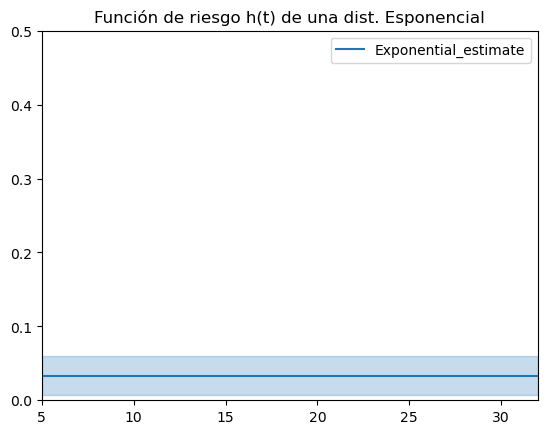

In [11]:
#Así se grafica la funcion de riesfo h(t), con funcion.plot_hazard
exponencial.plot_hazard()
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.title('Función de riesgo h(t) de una dist. Esponencial')

(5.0, 32.0)

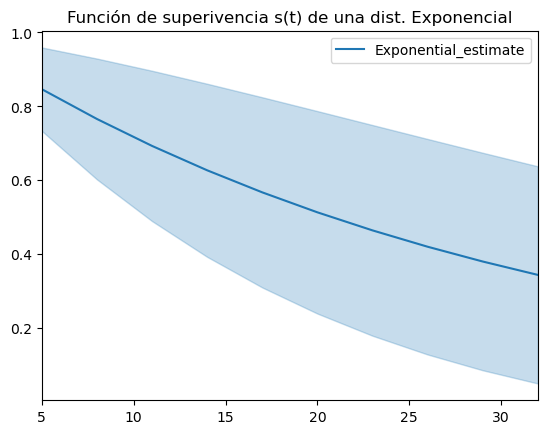

In [12]:
exponencial.plot_survival_function()
plt.title('Función de superivencia s(t) de una dist. Exponencial')
plt.xlim(5,32)

(5.0, 32.0)

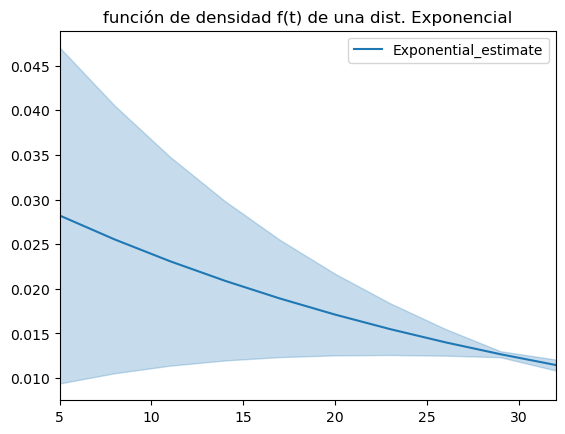

In [14]:
exponencial.plot_density()
plt.title('función de densidad f(t) de una dist. Exponencial')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

# Weibull
Suponiendo que el tiempo de supervivencia se distribuye Weibull

In [15]:
mWeibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [17]:
#Función gamma de weibull
mWeibull.rho_

#en este caso, la gamma es positiva por lo que el riesgo debería sr creciente

1.8867259500116444

(5.0, 32.0)

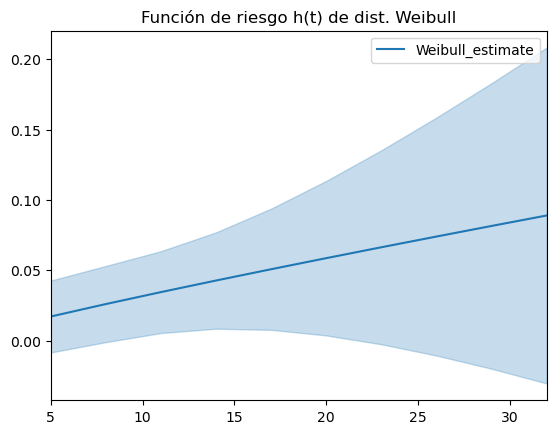

In [18]:
#Grafica h(t)
mWeibull.plot_hazard()
plt.title('Función de riesgo h(t) de dist. Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

(5.0, 32.0)

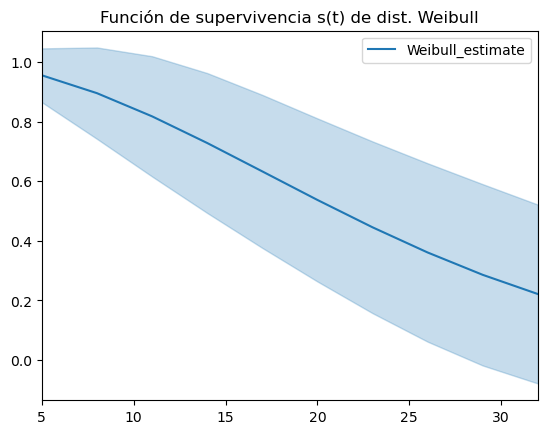

In [19]:
#Grafica s(t)
mWeibull.plot_survival_function()
plt.title('Función de supervivencia s(t) de dist. Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

(5.0, 32.0)

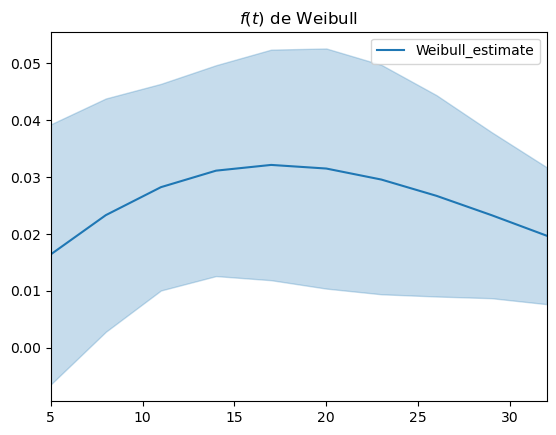

In [20]:
#Grafica f(t)
mWeibull.plot_density()
plt.title('$f(t)$ de Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

## Log Normal
Suponiendo que el log(tiempo) de supervivencia se distribuye Normal
la base del log es e, o bien, es ln()

In [21]:
mLogN = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

(5.0, 32.0)

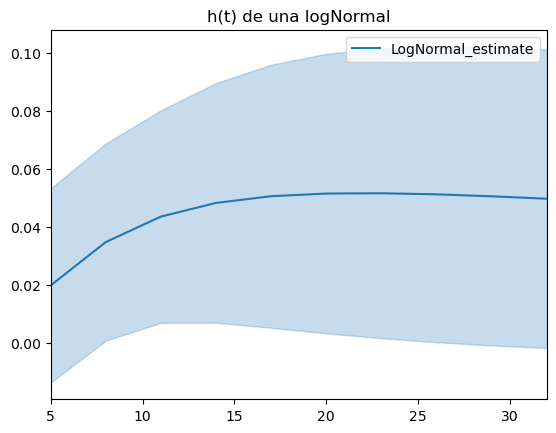

In [22]:
#Gradica de riesgo h(t)
mLogN.plot_hazard()
plt.title('h(t) de una logNormal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

In [23]:
mLogN.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850
